In [2]:
## create embeddings for all GO Terms and save the embeddings 
from semanticSimFunctions import getSentenceEmbedding
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tqdm import tqdm

SapBERT_tokenizer = AutoTokenizer.from_pretrained('cambridgeltl/SapBERT-from-PubMedBERT-fulltext')
SapBERT_model = AutoModel.from_pretrained('cambridgeltl/SapBERT-from-PubMedBERT-fulltext')

import pickle
# get the embeddings for the go terms we made in TASK1
with open('data/all_go_terms_embeddings_dict.pkl', 'rb') as handle:
    all_go_terms_embeddings_dict = pickle.load(handle)
print(len(all_go_terms_embeddings_dict))


11943


In [3]:
# load our GO term table 
go_terms = pd.read_csv('data/go_terms.csv', index_col=0)
print(go_terms.head())

           GO                                              Genes  Gene_Count  \
0  GO:0006311                                 TEX11 PRDM9 RNF212           3   
1  GO:0006855  ABCB11 ABCC4 ABCC3 SLC29A2 SLC37A3 SLC19A1 SLC...          16   
2  GO:0006890  GOLPH3L ARCN1 GBF1 KDELR1 BET1L PICK1 COPZ2 SC...          52   
3  GO:1900372                                PARP1 FLCN RD3 PID1           4   
4  GO:0031645  LPIN1 HCRT GPR35 EIF2AK3 GLRA1 MTNR1B CCN3 MTM...          16   

                                    Term_Description  
0                            meiotic gene conversion  
1                 xenobiotic transmembrane transport  
2  retrograde vesicle-mediated transport, Golgi t...  
3  negative regulation of purine nucleotide biosy...  
4      negative regulation of nervous system process  


In [9]:
inputFile = 'data/omics_revamped_LLM_gprofiler_new_gene_name_DF_APV_only.tsv'
data = pd.read_csv(inputFile, sep='\t')
data.head()

,Source,GeneSetID,GeneSetName,GeneList,updated GeneList,n_Genes,LLM Name,LLM Analysis,Score,Term,...,intersections,gprofiler_JI,gprofiler_coverage,Supporting Genes,Supporting Count,LLM Support Analysis,GenesMentionedInText,LLM_coverage,LLM_success_TF,gprofiler_success_TF
0,L1000,BRD-A00546892_-666_MCF7_6.0_h_10.0_um,BRD-A00546892 -666 MCF7 6.0 h 10.0 um,CITED2 COL5A1 CRABP2 KCTD12 MDFIC MMP2 NRP1 OR...,CITED2 COL5A1 CRABP2 KCTD12 MDFIC MMP2 NRP1 OR...,24,Cellular Matrix Remodeling and Tissue Development,"1. CITED2, TWIST1, and LMO2 are transcriptiona...",0.85,collagen metabolic process,...,"COL5A1,MMP2,VIM,CST3",0.033613,0.181818,CITED2 TWIST1 COL5A1 MMP2 NRP1,5.0,-- Summary --||The selected genes support the ...,24.0,0.21,True,True
1,L1000,BRD-A00993607_ALPRENOLOL_MCF7_6.0_h_10.0_um,BRD-A00993607 ALPRENOLOL MCF7 6.0 h 10.0 um,1060P11.3 ADM AHR AMIGO2 ARL4C ATP10D CAV2 CD4...,1060P11.3 ADM AHR AMIGO2 ARL4C ATP10D CAV2 CD4...,47,Cellular Adhesion and Extracellular Matrix Int...,"1. Several proteins in this system, such as CD...",0.85,defense response,...,"1060P11.3,ADM,CAV2,CDC42EP3,CHST1,EMP1,IGF2BP3...",0.008242,0.340909,CD44 EMP1 AMIGO2 POSTN COMP EXT1,6.0,-- Summary --||The selected genes support the ...,15.0,0.13,True,True
2,L1000,BRD-A00993607_Alprenolol hydrochloride_MCF7_6....,BRD-A00993607 Alprenolol hydrochloride MCF7 6....,ABAT ASS1 CHI3L1 CHST2 CLDN3 EIF5B FRZB GAL HE...,ABAT ASS1 CHI3L1 CHST2 CLDN3 EIF5B FRZB GAL HE...,59,System of unrelated proteins,The provided list of interacting proteins enco...,0.00,response to chemical,...,"ABAT,ASS1,CHI3L1,CLDN3,GAL,PDE8B,TRD,TYMP,1060...",0.006021,0.452830,NaN,NaN,NaN,NaN,NaN,False,True
3,L1000,BRD-A01320529_Salmeterol_MCF7_6.0_h_10.0_um,BRD-A01320529 Salmeterol MCF7 6.0 h 10.0 um,AMIGO2 AREG GAS6 GPR37 IFT57 PELI1 SQLE AKAP12...,AMIGO2 AREG GAS6 GPR37 IFT57 PELI1 SQLE AKAP12...,9,System of unrelated proteins,1. AMIGO2 (Amphoterin Induced Gene and ORF) is...,0.00,regulation of oligodendrocyte apoptotic process,...,"GAS6,AKAP12",0.222222,0.222222,NaN,NaN,NaN,NaN,NaN,False,True
4,L1000,BRD-A01346607_FLUMETHASONE_MCF7_6.0_h_10.0_um,BRD-A01346607 FLUMETHASONE MCF7 6.0 h 10.0 um,1060P11.3 CPE EFNB2 HIST1H2AC IL1R2 INHBB LYPD...,1060P11.3 CPE EFNB2 H2AC6 IL1R2 INHBB LYPD1 NU...,15,System of unrelated proteins,1. The proteins listed do not appear to conver...,0.00,cellular response to interleukin-1,...,"H2AC6,IL1R2,NUP93,SOX9",0.034483,0.285714,NaN,NaN,NaN,NaN,NaN,False,True


In [2]:
# def calc_LLM_JI(supporting_count, query_gene_list, GO_gene_list):
    
#     union = len(set(query_gene_list).union(set(GO_gene_list)))
#     return supporting_count/union if union != 0 else 0
def calc_LLM_JI(supporting_count, query_size, GO_size):
    # if the best matching GO term size is smaller than the supporting count, then make the size be the same as the supporting count
    if GO_size < supporting_count:
         GO_size = supporting_count
    union = query_size + GO_size - supporting_count
    return supporting_count/union if union != 0 else 0


def get_closest_GO(LLM_name, all_go_terms_embeddings_dict):
        # get llm name embedding
        LLM_name_emb = getSentenceEmbedding(LLM_name, SapBERT_tokenizer, SapBERT_model)
        # get the cosine similarity between the LLM name and all GO terms
        LLM_GO_sim = {}
        for term, emb in all_go_terms_embeddings_dict.items():
            GO_emb = emb
            GO_llm_sim = cosine_similarity(LLM_name_emb, GO_emb)[0][0]
            LLM_GO_sim[term] = GO_llm_sim
        # get the best matching GO term
        best_matching_GO = max(LLM_GO_sim, key=LLM_GO_sim.get)
        return best_matching_GO

In [54]:
col_keep = ['Source','GeneSetID','GeneList','n_Genes', 'LLM Name', 'LLM_best_matching_GO','best_matching_GO_ID', 'best_matching_GO_term_genes', 'best_matching_GO_term_size', 'Supporting Count', 'LLM_JI']

# initialize the data frame 
df = data.copy()
df['LLM_best_matching_GO'] = None
df['best_matching_GO_ID'] = None
df['best_matching_GO_term_genes'] = None
df['best_matching_GO_term_size'] = None
df['LLM_JI'] = None

for ind, row in tqdm(df.iterrows(), total=df.shape[0]):
    # if not pd.isna(row['LLM_best_matching_GO']):
    #     # no need to calculate the embeddings again
    #     continue
    LLM_name = row['LLM Name'] 
    if LLM_name == 'System of unrelated proteins':
        # dont find best matching GO term for the one does not named
        continue
    else:
        best_matching_GO = get_closest_GO(LLM_name, all_go_terms_embeddings_dict)
        df.loc[ind, 'LLM_best_matching_GO'] = best_matching_GO
        df.loc[ind, 'best_matching_GO_ID'] = go_terms.loc[go_terms['Term_Description'] == best_matching_GO, 'GO'].values[0]
        # get GO gene list 
        gene_list = go_terms.loc[go_terms['Term_Description'] == best_matching_GO, 'Genes'].values[0].split(' ')
        df.loc[ind, 'best_matching_GO_term_genes'] = ' '.join(gene_list)
        # get the GO term size 
        term_size = go_terms.loc[go_terms['Term_Description'] == best_matching_GO, 'Gene_Count'].values[0]
        assert len(gene_list) == term_size, f'{best_matching_GO}: GO gene list and term size does not match'
        df.loc[ind, 'best_matching_GO_term_size'] = term_size
        # # get intersections 
       
        # intersection = list(set(gene_list).intersection(LLM_genes))
        # df.loc[ind, 'best_matching_GO_term_intersection'] = ' '.join(intersection)

        # calculate JI 
        LLM_genes = row['updated GeneList'].split(' ')
        supporting_count = row['Supporting Count']
        JI = calc_LLM_JI(supporting_count,LLM_genes, gene_list)
        df.loc[ind, 'LLM_JI'] = JI

    df.loc[:, col_keep].to_csv('data/omics_revamped_LLM_w_best_matching_GO_terms_for_JI.tsv', sep='\t', index=False)

print('DONE')
df.loc[:, col_keep].to_csv('data/omics_revamped_LLM_w_best_matching_GO_terms_for_JI.tsv', sep='\t', index=False)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [12:54<00:00,  2.58s/it]

DONE


In [3]:
llm_JI_df = pd.read_csv('data/omics_revamped_LLM_w_best_matching_GO_terms_for_JI.tsv', sep='\t')
llm_JI_df

,Source,GeneSetID,GeneList,n_Genes,LLM Name,LLM_best_matching_GO,best_matching_GO_ID,best_matching_GO_term_genes,best_matching_GO_term_size,Supporting Count,LLM_JI
0,L1000,BRD-A00546892_-666_MCF7_6.0_h_10.0_um,CITED2 COL5A1 CRABP2 KCTD12 MDFIC MMP2 NRP1 OR...,24,Cellular Matrix Remodeling and Tissue Development,connective tissue development,GO:0061448,CRIP1 GDF5 IL17F MAF NOTCH1 AMELX VPS13B NFATC...,286.0,5.0,0.016181
1,L1000,BRD-A00993607_ALPRENOLOL_MCF7_6.0_h_10.0_um,1060P11.3 ADM AHR AMIGO2 ARL4C ATP10D CAV2 CD4...,47,Cellular Adhesion and Extracellular Matrix Int...,cell-matrix adhesion,GO:0007160,CX3CL1 BCR ARHGEF7 PLET1 ITGA7 TNXB ADAMTS13 N...,235.0,6.0,0.021429
2,L1000,BRD-A00993607_Alprenolol hydrochloride_MCF7_6....,ABAT ASS1 CHI3L1 CHST2 CLDN3 EIF5B FRZB GAL HE...,59,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN
3,L1000,BRD-A01320529_Salmeterol_MCF7_6.0_h_10.0_um,AMIGO2 AREG GAS6 GPR37 IFT57 PELI1 SQLE AKAP12...,9,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN
4,L1000,BRD-A01346607_FLUMETHASONE_MCF7_6.0_h_10.0_um,1060P11.3 CPE EFNB2 HIST1H2AC IL1R2 INHBB LYPD...,15,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,Viral_Infections,hMPV_72Hour,RNMT SAMD9L CEBPB CEBPG PSMD12 RSRC2 XBP1 GADD...,22,Cellular Stress Response and Protein Homeostasis,cellular response to stress,GO:0033554,COMT ALKBH8 SESN3 STRADB ATP5IF1 MID1 CASP9 ST...,1920.0,6.0,0.003101
296,Viral_Infections,icSARA deltaORF6_48Hour,FGF19 ADM2 LRIT1 UCHL1 SLC19A1 TSSC1 INPP5J HY...,49,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN
297,Viral_Infections,icSARS CoV_12Hour...321,TSPY3 LGALS14 PPBPP2 LARS MRPS10 PAX9 RBM22 LO...,16,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN
298,Viral_Infections,icSARS CoV_3Hour,ANK2 GAB3 TGFB3 CECR3 MUC19 LOC100507053 ZNF36...,99,System of unrelated proteins,NaN,NaN,NaN,NaN,NaN,NaN


0


40

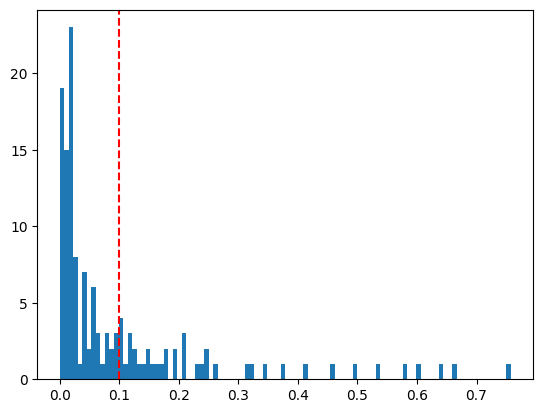

In [65]:
import matplotlib.pyplot as plt
# number of Nones in LLM JI
print(df['LLM_JI'].isna().sum())
#remove NA
df = df.dropna(subset=['LLM_JI'])
plt.hist(df['LLM_JI'], bins=100)
plt.axvline(x=0.1, color='r', linestyle='--')

len(df[df['LLM_JI'] > 0.1])